In [1]:
#json_parser 불러오기

from json_parser import json_loader, json_parser_to_pd

data_path = "data/XAPI_npe_1215.json"
#data_path = "data2/XAPI_5d933d.json" <- 데이터를 변경해도 잘 들어가는 것을 확인할 수 있음

json_data = json_loader(data_path)

In [2]:
df_data = json_parser_to_pd(json_data)

결측치 확인:  actor        0
object       0
verb         0
timestamp    0
dtype: int64


In [3]:
df_data.head()

,actor,object,verb,timestamp
0,learner10,삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT),시청기록,2021-12-14T18:33:42.326
1,learner10,삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT),시청중,2021-12-14T18:33:43.406
2,learner10,삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT),실행,2021-12-14T18:33:45.010
3,learner10,삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT),시청중,2021-12-14T18:33:46.410
4,learner10,삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT),시청중,2021-12-14T18:33:47.424


In [4]:
from xAPI_Analyzer import Analyzer

xAPI_analyzer = Analyzer(df_data)

# 1. 활동량 분석

In [5]:
students, total_logs = xAPI_analyzer.analyze_activities()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50980 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49437 missing from current font.
  font.set_

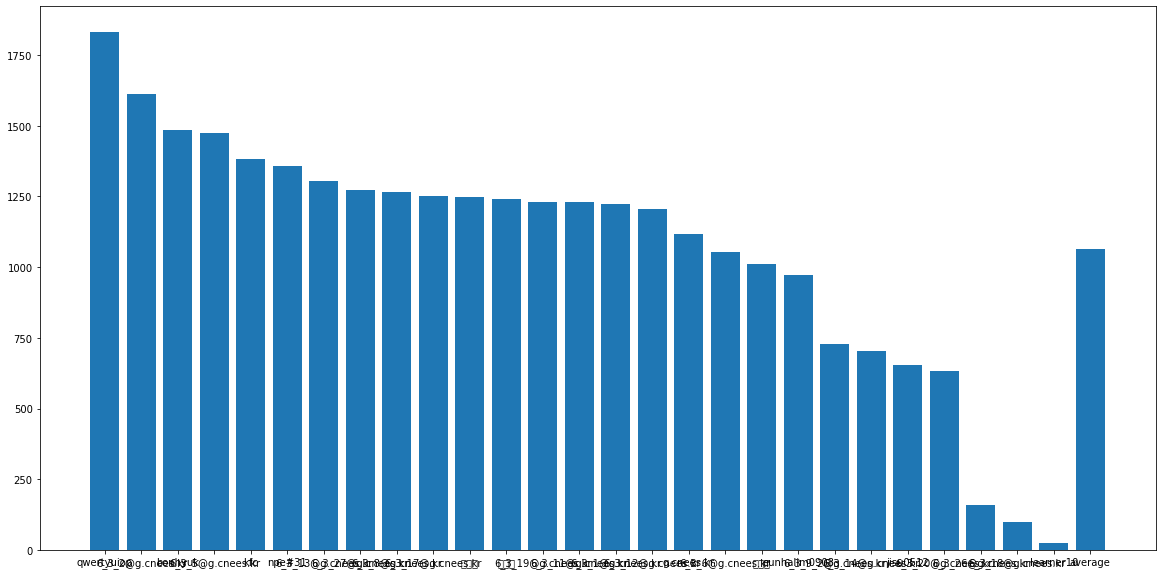

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
from visualizer import act_visualizer

#시각화 결과문 visualization 폴더에 저장
act_visualizer(students, total_logs)

# 2. 시청 행동 분석

In [7]:
unique_actor, data_list = xAPI_analyzer.analyze_watching_time()

In [8]:
#한글폰트 설정 -> 해결필요
import os
import matplotlib.pyplot as plt

# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47197 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_

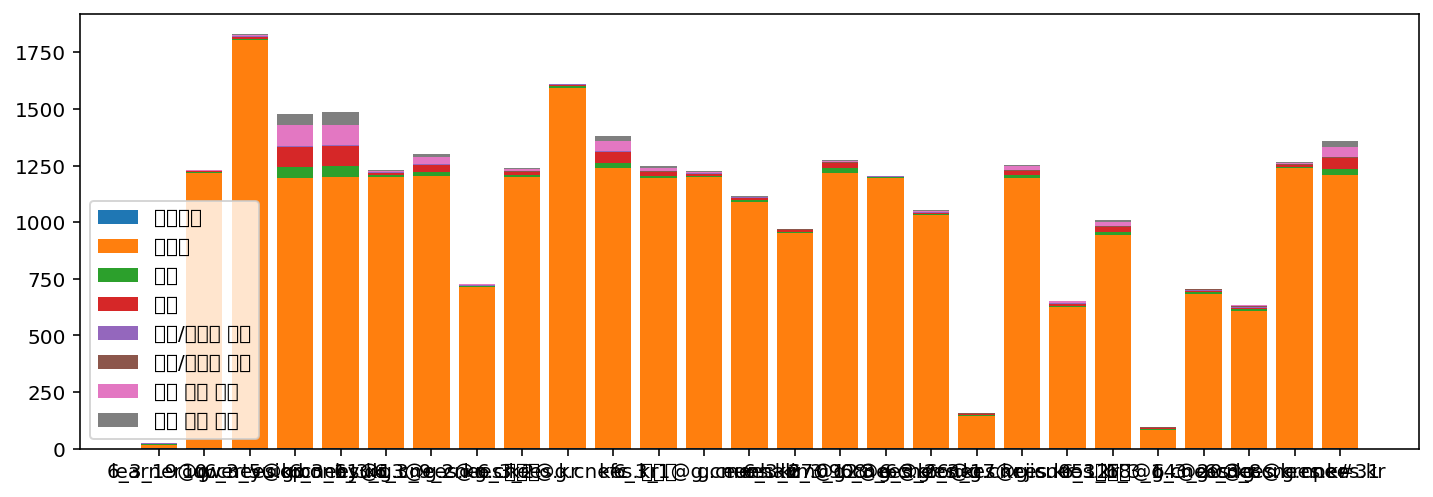

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

from visualizer import watching_visualizer

#시각화 결과문 visualization 폴더에 저장
watching_visualizer(unique_actor, data_list)

# 3. 개인별 영상 시청 행동 분석

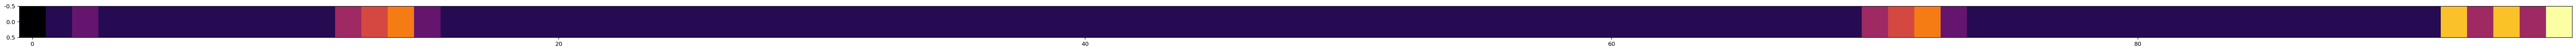

In [10]:
verb_list = xAPI_analyzer.personal_watching_time('6_3_18@g.cnees.kr')

from visualizer import personal_watching_visualizer

personal_watching_visualizer(verb_list, '6_3_18@g.cnees.kr')